In [2]:
from typing import Dict, List, Tuple

### Task 1

In [3]:
# DFS

class Environment:
  def __init__(self, graph: Dict[str, List[str]], source: str):
    self.__source = source
    self.__graph = graph

  def get_precept(self):
    return self.__source

  def search(self, goal: str):
    s = [self.__source]
    visited = set([self.__source])

    while s:
      u = s.pop()

      if u == goal:
        return True

      for v in self.__graph[u][::-1]:
        if v in visited:
          continue
        s.append(v)
        visited.add(v)
    return False

class GoalBasedAgent:
  def __init__(self, goal: str):
    self.__goal = goal
    self.__reached: bool = False
  
  def goal_status(self):
    return self.__reached

  def act(self, env: Environment):
    self.__reached = env.search(self.__goal)

graph = {
  'A': ['B'],
  'B': ['C'],
  'C': ['D'],
  'D': []
}

agent = GoalBasedAgent('D')
env = Environment(graph, 'A')

def run_agent(agent: GoalBasedAgent, env: Environment):
  agent.act(env)
  if agent.goal_status():
    print('Goal reached')
  else:
    print('Goal could not be reached')

run_agent(agent, env)

Goal reached


In [4]:
# DLS

class Environment:
  def __init__(self, graph: Dict[str, List[str]], source: str):
    self.__source = source
    self.__graph = graph

  def get_precept(self):
    return self.__source

  def search(self, goal: str, depth_limit: int):
    s = [(self.__source, 0)]
    visited = set([self.__source])

    while s:
      u, d = s.pop()

      if d > depth_limit:
        continue

      if u == goal:
        return True

      for v in self.__graph[u][::-1]:
        if v in visited:
          continue
        s.append((v, d+1))
        visited.add(v)
    return False

class GoalBasedAgent:
  def __init__(self, goal: str):
    self.__goal = goal
    self.__reached: bool = False
  
  def goal_status(self):
    return self.__reached

  def act(self, env: Environment):
    self.__reached = env.search(self.__goal, 3)

graph = {
  'A': ['B'],
  'B': ['C'],
  'C': ['D'],
  'D': []
}

agent = GoalBasedAgent('D')
env = Environment(graph, 'A')

def run_agent(agent: GoalBasedAgent, env: Environment):
  agent.act(env)
  if agent.goal_status():
    print('Goal reached')
  else:
    print('Goal could not be reached')

run_agent(agent, env)

Goal reached


In [5]:
import heapq

# UCS

class Environment:
  def __init__(self, graph: Dict[str, List[Tuple[str, int]]], source: str):
    self.__source = source
    self.__graph = graph

  def get_precept(self):
    return self.__source

  def search(self, goal: str):
    q = [(0, self.__source)]
    visited = set()
    dist = {self.__source: 0}

    while q:
      d, u = heapq.heappop(q)

      if u == goal:
        return True
      
      if u in visited:
        continue
      visited.add(u)

      for v, w in self.__graph[u]:
        nw = d + w
        if nw < dist.get(v, float('inf')):
          dist[v] = nw
          heapq.heappush(q, (nw, v))
      
    return False

class UtilityBasedAgent:
  def __init__(self, goal: str):
    self.__goal = goal
    self.__reached: bool = False
  
  def goal_status(self):
    return self.__reached

  def act(self, env: Environment):
    self.__reached = env.search(self.__goal)

graph: Dict[str, Tuple[str, int]] = {
  'A': [('B', 2), ('C', 1)],
  'B': [('C', 1), ('D', 1)],
  'C': [('D', 3)],
  'D': []
}

agent = UtilityBasedAgent('D')
env = Environment(graph, 'A')

def run_agent(agent: UtilityBasedAgent, env: Environment):
  agent.act(env)
  if agent.goal_status():
    print('Goal reached')
  else:
    print('Goal could not be reached')

run_agent(agent, env)

Goal reached


### Task 2
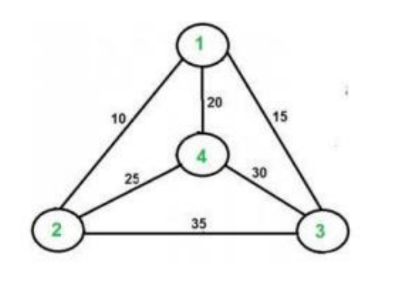

In [6]:
# TSP

def minimum_cost_tsp(graph: Dict[int, List[Tuple[int, int]]]) -> int:
  n = len(graph)

  def dfs(source: int, u: int, p: int, d: int, visited: set[int]):
    if p == n:
      for v, w in graph[u]:
        if v == source:
          return w + d
      return float('inf')
    
    dist = float('inf')
    for v, w in graph[u]:
      if v in visited:
        continue
      visited.add(v)
      dist = min(dist, dfs(source, v, p+1, w + d, visited))
      visited.remove(v)
    return dist

  res = float('inf')
  for i in range(1, n+1):
    res = min(res, dfs(i, i, 1, 0, set([i])))
  return res

minimum_cost_tsp({
  1: [(2, 10), (4, 20), (3, 15)],
  2: [(1, 10), (4, 25), (3, 35)],
  3: [(2, 35), (4, 30), (1, 15)],
  4: [(1, 20), (2, 25), (3, 30)]
})

80

### Task 3

In [7]:
from typing import Optional

# Iterative Deepening Depth First Search (IDDFS)

def idf(graph: Dict[str, List[str]], source: str, goal: str, maximum_depth: int) -> Optional[int]:
  def dfs(u: str, limit: int, visited: set[str]):
    visited.add(u)
    if u == goal:
      return True
    
    if limit == 0:
      return False
    
    for v in graph[u]:
      if v in visited:
        continue
      if dfs(v, limit - 1, visited):
        return True
    return False

  for limit in range(maximum_depth):
    if dfs(source, limit, set()):
      return limit

idf(
  graph={
    'A': ['B'],
    'B': ['C'],
    'C': ['D'],
    'D': []
  },
  source='A',
  goal='D',
  maximum_depth=5
)

3

In [9]:
from collections import deque
from typing import Deque

# Bidirectional Search

def bidirectional(graph: Dict[str, List[str]], source: str, goal: str) -> bool:
  def helper(q: Deque[str], visited: set[str]):
    u = q.popleft()
    visited.add(u)

    for v in graph[u]:
      if v in visited:
        continue
      q.append(v)
  
  source_q, goal_q = deque([source]), deque([goal])
  source_visited, goal_visited = set(), set()
  while source_q and goal_q:
    helper(source_q, source_visited)
    helper(goal_q, goal_visited)
    if source_visited & goal_visited:
      return True
  return False

bidirectional(
  graph = {
    "A": ["B", "C"],
    "B": ["A", "D", "E"],
    "C": ["A", "F"],
    "D": ["B", "E"],
    "E": ["B", "D", "F"],
    "F": ["C", "E"]
  },
  source='A',
  goal='F'
)

True